C:\Users\turev\AppData\Local\Temp\ipykernel_8536\763731872.py:30: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  link_data=link_data.resample('15T').mean()


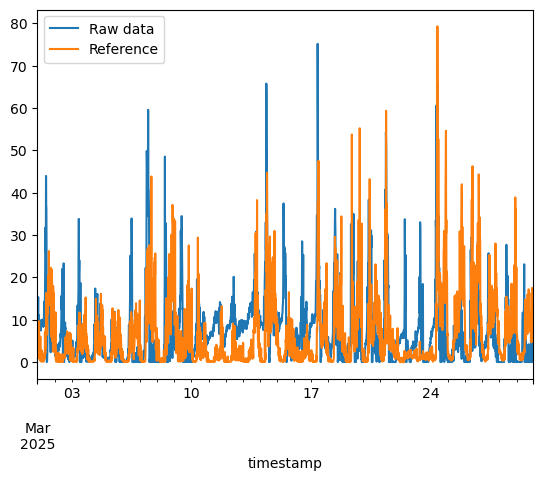

In [40]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import load_data
from  scipy import signal
import numpy as np
from sklearn.metrics import mean_squared_error
import time

sensor_file = "data/refdata/linkoping-kvartar"
sensor_data, sensor_desc = load_data.load_slb_data(sensor_file)

link_file = "data/sensordata/linkoping.csv"
link_data, link_desc = load_data.load_sensor_data(link_file)

#För att välja mellan två olika tider på dygnet (alla dagar)
#print(svea_data.between_time('08:00','09:00'))
#print(svea_desc)
#För att välja mellan två olika datum (tider)
start = datetime.datetime(2025,3,1)
end = datetime.datetime(2025,3,30)
link_data=link_data["NO"][start:end]
sensor_data=sensor_data["NO"][start:end]
sensor_data=sensor_data[:-1]
sensor_data.dropna()
link_data.dropna()

#För att välja vilka gaser du får ut:
link_data=link_data.resample('15T').mean()
link_data.plot(label='Raw data')
sensor_data.plot(label='Reference')
plt.legend(loc='upper left')
plt.show()


In [ ]:
sensor_data=sensor_data.astype(float)
sensor_array=sensor_data.to_numpy()
link_array=link_data.to_numpy()

sensor_array=sensor_array[~np.isnan(sensor_array)]
ind=np.arange(1878,1883)
link_array=np.delete(link_array,ind)

mean_squared_error(sensor_array,link_array)
print(np.corrcoef(sensor_array,link_array))


[[1.         0.32649654]
 [0.32649654 1.        ]]
